# About Notebook:
In this notebook, I use Titanic Dataset. And I apply `Function Transformers(log, log1p, reciprocal, square, square_root transformers)`.


In [1]:
import pandas as pd
import numpy as np

# for ploting -- QQ Plot
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# function transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [26]:
df = sns.load_dataset("titanic")

In [27]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


## I need only three columns from whole dataset

In [28]:
df = df.loc[:, ["survived","age","fare","pclass"]]

In [29]:
df.head(3)

,survived,age,fare,pclass
0,0,22.0,7.2500,3
1,1,38.0,71.2833,1
2,1,26.0,7.9250,3


In [30]:
df.shape

(891, 4)

In [31]:
df.isnull().sum()

survived      0
age         177
fare          0
pclass        0
dtype: int64

In [32]:
df.duplicated().sum()

145

## Fill null values of `Age Column`

In [33]:
def age_imputer(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        if pclass==1:
            return 23
        elif pclass==2:
            return 27
        else:
            return 32
    else:
        return age

df["age"] = df[["age","pclass"]].apply(age_imputer, axis=1)

In [34]:
df.isnull().sum()

survived    0
age         0
fare        0
pclass      0
dtype: int64

## We don't need `Pclass column`. I only use it before to fill null values of age

In [36]:
df.drop("pclass", axis=1, inplace=True)

In [37]:
df.head(3)

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


## Splitting Dataset into training and testing

In [78]:
x = df.loc[:, ['age','fare']]
y = df.iloc[:, 0]

In [79]:
df.loc[df.duplicated().sum(), :]

survived     0.0
age         42.0
fare        13.0
Name: 149, dtype: float64

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [81]:
y_train

661    0
393    1
266    0
144    0
446    1
      ..
440    1
165    1
7      0
219    0
326    0
Name: survived, Length: 712, dtype: int64

## Visualization: Age Column & Fare Column

`These are two techniques to check whether the data is normally distributed or not:`
<ul>
    <li>Seaborn Histogram</li>
    <li>Q-Q plot using scipy.stats</li>
</ul>

Text(0.5, 1.0, 'Age Q-Q Plot')

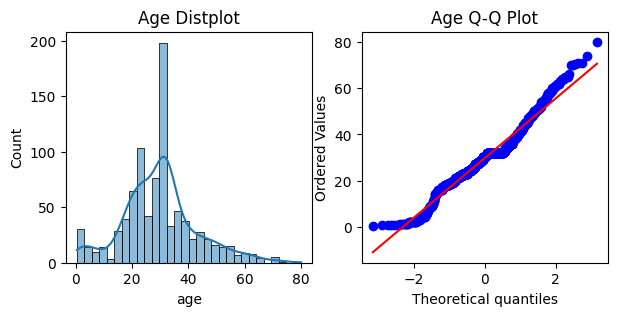

In [73]:
figure, (axes1,axes2) = plt.subplots(ncols=2, figsize=(7,3))

sns.histplot(df["age"], kde=True, ax=axes1)
axes1.set_title("Age Distplot")

stats.probplot(df["age"], dist="norm", plot=axes2)
axes2.set_title("Age Q-Q Plot")

Text(0.5, 1.0, 'Fare Q-Q Plot')

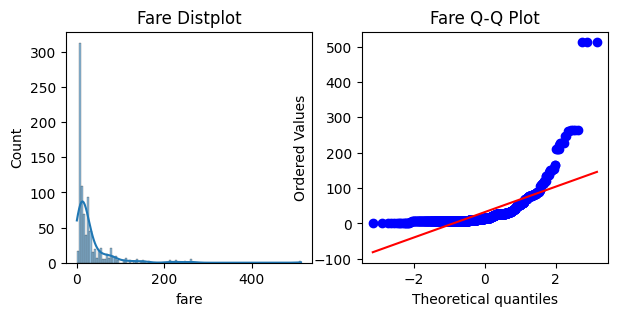

In [75]:
figure, (axes1,axes2) = plt.subplots(ncols=2, figsize=(7,3))

sns.histplot(df["fare"], kde=True, ax=axes1)
axes1.set_title("Fare Distplot")

stats.probplot(df["fare"], dist="norm", plot=axes2)
axes2.set_title("Fare Q-Q Plot")

## Accuracy before Function Transformer

In [82]:
logistic = LogisticRegression()
tree = DecisionTreeClassifier()

In [83]:
logistic.fit(x_train, y_train)
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
logistic_pred = logistic.predict(x_test)
tree_pred = tree.predict(x_test)

In [85]:
print("Accuracy of Logistic Regression :",accuracy_score(y_test, logistic_pred))
print("Accuracy of Decision Tree :",accuracy_score(y_test, tree_pred))

Accuracy of Logistic Regression : 0.659217877094972
Accuracy of Decision Tree : 0.6871508379888268


## Accuracy after Function Transformer


`Log Transformer` include 2 methods:
<ul>
    <li>np.log `(It is not better sometimes means it data has 0 value then log not applied)`</li>
    <li>np.log1p `(It is better because before transformation it add 1 to data, so if data will have 0 value then it will automatically handled)`</li>
</ul>


In [146]:
trf = FunctionTransformer(func=np.log1p)

In [147]:
trf.fit(x_train)
x_train_transformation = trf.transform(x_train)
x_test_transformation = trf.transform(x_test)

In [150]:
x_train_transformation

,age,fare
661,3.713572,2.107178
393,3.178054,4.738608
266,2.833213,3.705921
144,2.944439,2.525729
446,2.639057,3.020425
...,...,...
440,3.828641,3.305054
165,2.302585,3.069215
7,1.098612,3.094446
219,3.433987,2.442347


In [95]:
logistic2 = LogisticRegression()
tree2 = DecisionTreeClassifier()

In [96]:
logistic2.fit(x_train_transformation, y_train)
tree2.fit(x_train_transformation, y_train)

DecisionTreeClassifier()

In [97]:
logistic2_pred = logistic2.predict(x_test_transformation)
tree2_pred = tree2.predict(x_test_transformation)

In [98]:
print("Accuracy of Logistic Regression2 : ", accuracy_score(y_test, logistic2_pred))
print("Accuracy of Decision Tree2 : ", accuracy_score(y_test, tree2_pred))

Accuracy of Logistic Regression2 :  0.6983240223463687
Accuracy of Decision Tree2 :  0.664804469273743


## Visualization: `Age and Fare Column Before and After Function Transformation`

Text(0.5, 1.0, 'After Age Q-Q Plot')

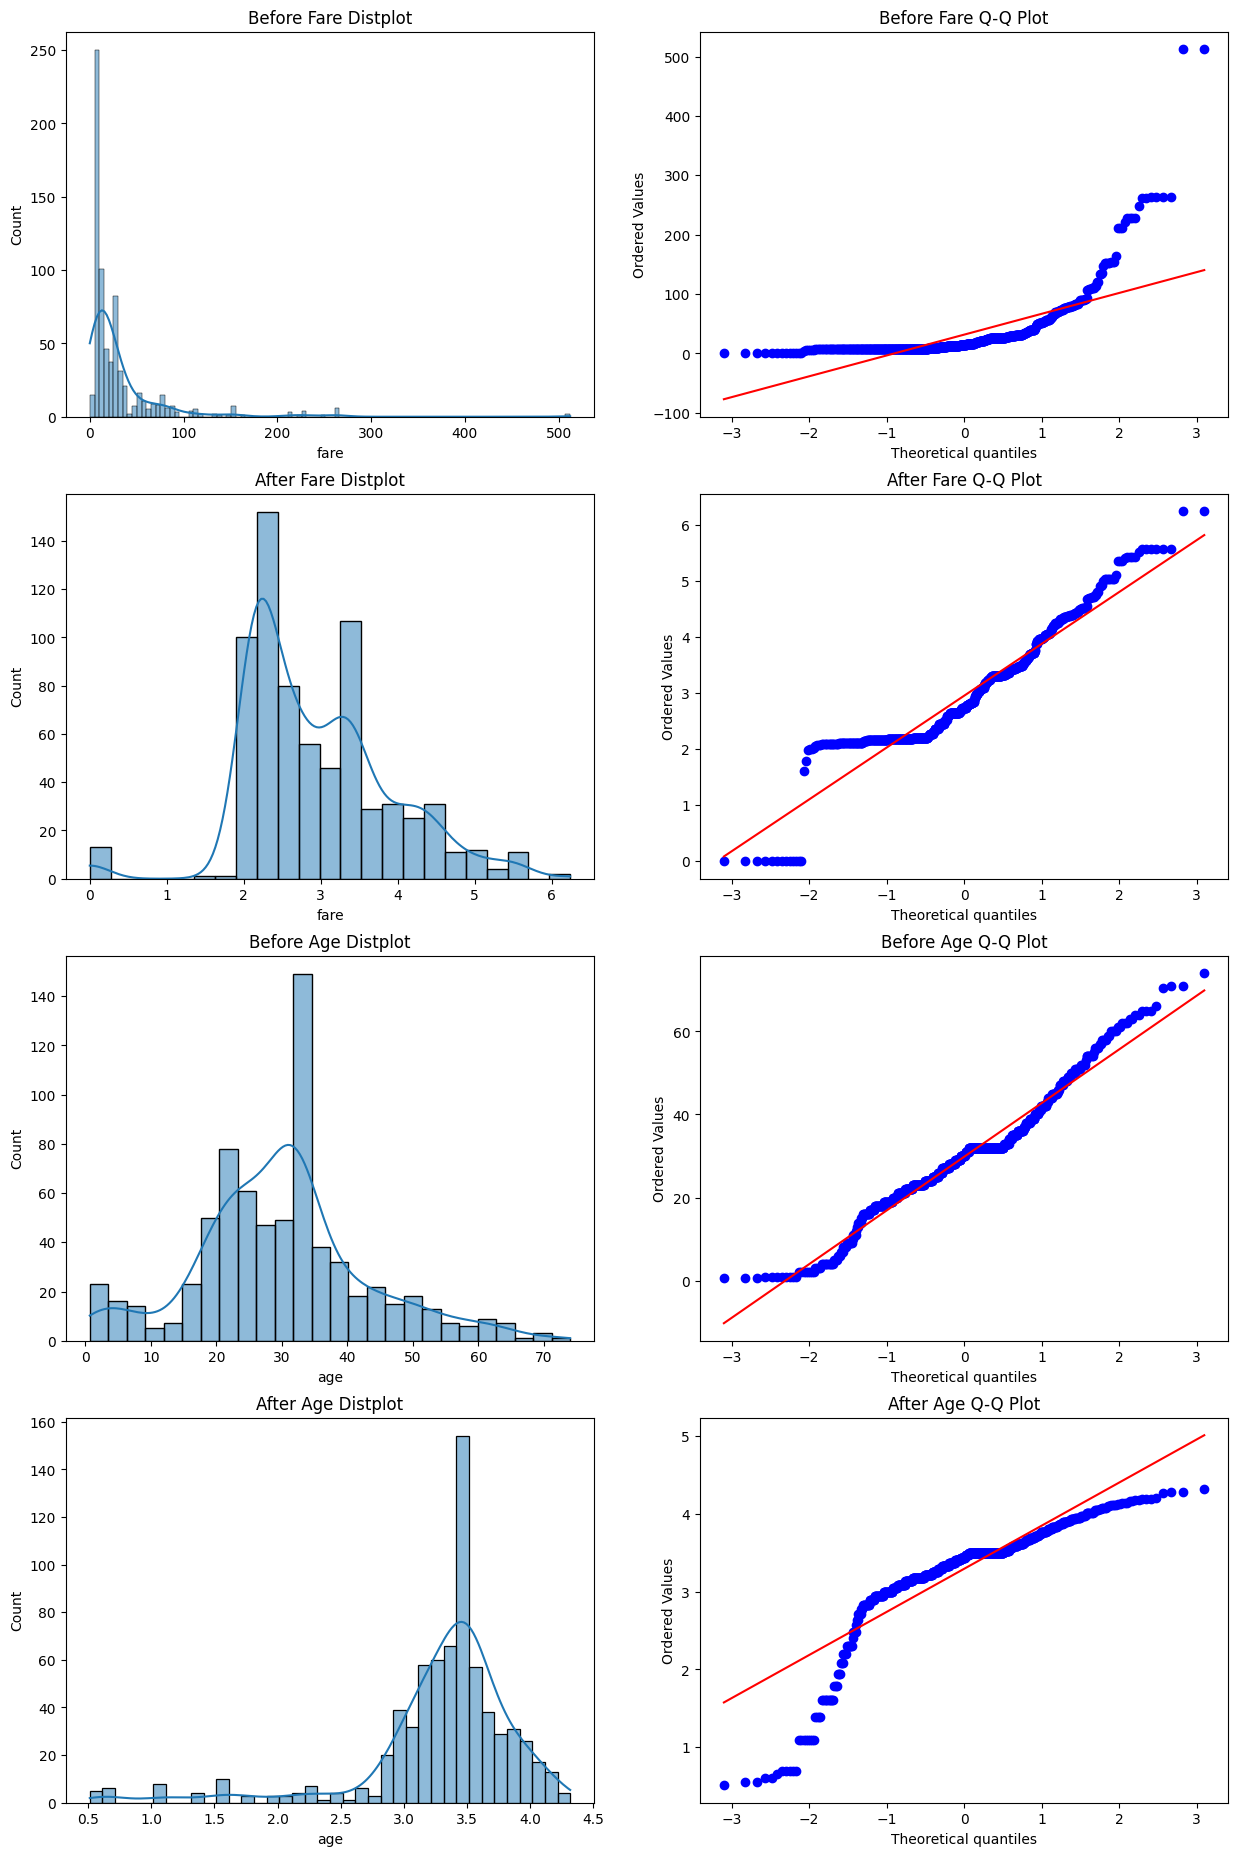

In [102]:
figure, axes = plt.subplots(nrows=4 ,ncols=2, figsize=(15,23))

sns.histplot(x_train["fare"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Before Fare Distplot")

stats.probplot(x_train["fare"], dist="norm", plot=axes[0,1])
axes[0,1].set_title("Before Fare Q-Q Plot")

sns.histplot(x_train_transformation["fare"], kde=True, ax=axes[1,0])
axes[1,0].set_title("After Fare Distplot")

stats.probplot(x_train_transformation["fare"], dist="norm", plot=axes[1,1])
axes[1,1].set_title("After Fare Q-Q Plot")

# for age
sns.histplot(x_train["age"], kde=True, ax=axes[2,0])
axes[2,0].set_title("Before Age Distplot")

stats.probplot(x_train["age"], dist="norm", plot=axes[2,1])
axes[2,1].set_title("Before Age Q-Q Plot")

sns.histplot(x_train_transformation["age"], kde=True, ax=axes[3,0])
axes[3,0].set_title("After Age Distplot")

stats.probplot(x_train_transformation["age"], dist="norm", plot=axes[3,1])
axes[3,1].set_title("After Age Q-Q Plot")

# Accuracy after Function Transformer

But here I applied Function Transformation on only `fare column` because age column is got disturbed after function transformation.
`So here i use column transformer to apply transformation on only fare column`

In [103]:
trf2 = ColumnTransformer(transformers=[
    ("log", FunctionTransformer(func=np.log1p), ['fare'])
], remainder='passthrough')

In [104]:
trf2.fit(x_train)
x_train_transformation2 = trf2.transform(x_train)
x_test_transformation2 = trf2.transform(x_test)

In [106]:
logistic3 = LogisticRegression()
tree3 = DecisionTreeClassifier()

logistic3.fit(x_train_transformation2, y_train)
tree3.fit(x_train_transformation2, y_train)

logistic3_pred = logistic3.predict(x_test_transformation2)
tree3_pred = tree3.predict(x_test_transformation2)

print("Accuracy of Logistic Regression 3: ", accuracy_score(y_test, logistic3_pred))
print("Accuracy of Decision Tree 3: ", accuracy_score(y_test, tree3_pred))

Accuracy of Logistic Regression 3:  0.6759776536312849
Accuracy of Decision Tree 3:  0.6871508379888268


## At the end: Apply different methods of function transformers 

Accuracy of Logistic Regression :  0.5865921787709497
Accuracy of Decision Tree :  0.6927374301675978


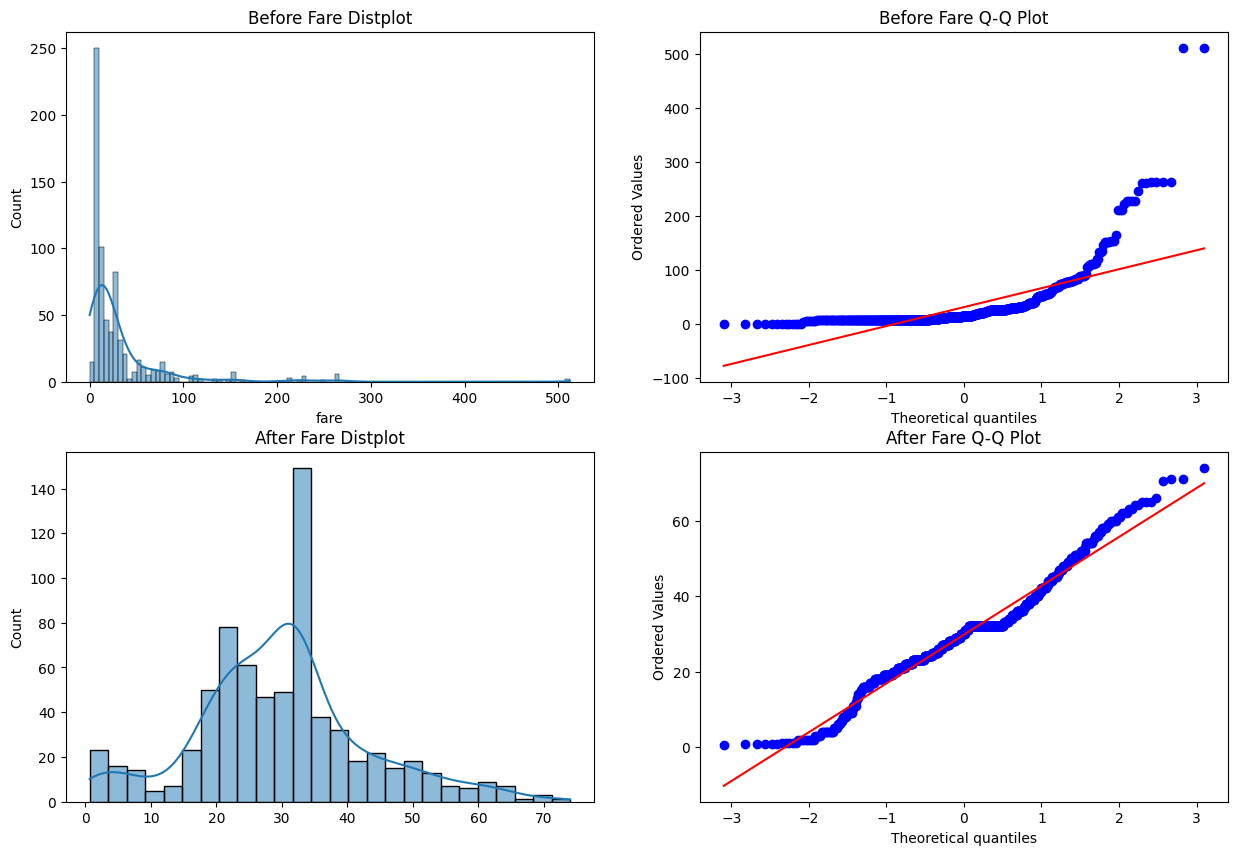

In [145]:
def different_transformers(transform_it):
    trf = ColumnTransformer(transformers=[
        ("square", FunctionTransformer(func=transform_it, validate=False), ['fare'])
    ], remainder='passthrough')
    
    trf.fit(x_train)
    x_train_transformation = trf.transform(x_train)
    x_test_transformation = trf.transform(x_test)
    
    logistic = LogisticRegression()
    tree = DecisionTreeClassifier()

    logistic.fit(x_train_transformation, y_train)
    tree.fit(x_train_transformation, y_train)

    logistic_pred = logistic.predict(x_test_transformation)
    tree_pred = tree.predict(x_test_transformation)

    print("Accuracy of Logistic Regression : ", accuracy_score(y_test, logistic_pred))
    print("Accuracy of Decision Tree : ", accuracy_score(y_test, tree_pred))
    
    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    sns.histplot(x_train["fare"], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title("Before Fare Distplot")

    stats.probplot(x_train["fare"], dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title("Before Fare Q-Q Plot")

    sns.histplot(x_train_transformation[:, 1], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title("After Fare Distplot")

    stats.probplot(x_train_transformation[:, 1], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title("After Fare Q-Q Plot")

different_transformers(lambda x: 1/(x+0.00001))
